# Project: Wrangling and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gather">Data Gathering</a></li>
<li><a href="#Access">Assessing the Data</a></li>
<li><a href="#Clean">Data Cleaning</a></li>
<li><a href="#Store">Storing the data</a></li>
<li><a href="#Analyses and Visualization">Analyzing and Visualizing Data</a></li>
<li><a href="#insights">Insights</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project provides focuses on wrangling of the ratings of dogs from a Twitter handle WeRateDogs. In the development of the project, the Gather-Assess-Clean approach was adopted for the wrangling process. This twitter account consists of pictures of various dogs and their ratings. The datasets used include 'image predictions', 'twitter_archive', 'tweet_json. Each datasets was cleaned and merged to get a master dataset. Upon completion of wrangling the master dataset was analyzed and visualized to share some useful insights.

<a id='Gather'></a>
## Data Gathering

### install tweepy and import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Opening a tsv file and saving the response content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [6]:


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

In [7]:
# Extract the missing columns from enhanced twitter archive

# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

<a id='Access'></a>
## Assessing Data

#### Visual assessment

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


In [11]:
tweet_json

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


### Programatic assesment

#### twitter_archive

In [12]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
509,812466873996607488,NaN,NaN,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mary. She's desperately trying to recr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812466873...,12,10,Mary,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
1162,723688335806480385,NaN,NaN,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,None,None,None,None


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
twitter_archive.duplicated().sum()

0

In [17]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [19]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### image_prediction

In [20]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great_Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese_dog,0.074962,True
1674,813142292504645637,https://pbs.twimg.com/media/C0jcmOKVQAAd0VR.jpg,3,beagle,0.848735,True,Ibizan_hound,0.044602,True,Italian_greyhound,0.018611,True
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
190,669393256313184256,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,1,cocker_spaniel,0.359843,True,Blenheim_spaniel,0.139519,True,toy_poodle,0.132746,True
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
sum(image_prediction['tweet_id'].duplicated())

0

In [24]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

#### tweet_json

In [27]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


In [30]:
sum(tweet_json['tweet_id'].duplicated())

0

In [31]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [32]:
tweet_json.nunique()

tweet_id           2354
retweet_count      1724
favorite_count     2007
followers_count      66
friends_count         1
dtype: int64

In [33]:
tweet_json.isna().sum()

tweet_id           0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [34]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issues

#### Twitter_archive
1. tweet_id is string not integer
 
2. rating_numerator and rating_denominator have extreme values

3. Erroneous data type (timestamp column is string instead of datetime)

4. Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

5. We only want original dog ratings. So to remove retweets (text column starts with RT @) as a user can retweet their on tweet

#### image_prediction
1. tweet_id is string not integer

#### tweet_json

1. tweet_id should be string not integer

### Tidiness issues

#### Twitter_archive
1. doggo, floofer, pupper, and puppo are dog stages hence should be shrinked into a column


#### image_prediction

1. drop columns not relevant for analysis

#### tweet_json

1. followers_count have 66 unique values and friend_count have 1 unique value (somethings wrong!!!)

<a id='Clean'></a>
## Cleaning Data
In this section, **all** issues documented while assessing will be cleaned.

In [35]:
# Make copies of original pieces of data
copy1=twitter_archive.copy()
copy2=image_prediction.copy()
copy3=tweet_json.copy()

### twitter_archive

### Issue #1:

#### Define: Remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Code 

In [37]:
copy1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [41]:
copy1 = copy1[copy1['retweeted_status_id'].isnull()]
copy1 = copy1[copy1['retweeted_status_user_id'].isnull()]
copy1 = copy1[copy1['retweeted_status_timestamp'].isnull()]

#### Test

In [42]:
lst=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
for i in lst:
    print(copy1[i].notnull().sum())

0
0
0


### Issue #2:

#### Define: Drop columns that are not relevant for analysis 

#### Code 

In [43]:
copy1 = copy1.loc[copy1['text'].str[:2]!='RT']

#### Test

In [44]:
copy1.loc[copy1['text'].str[:2]=='RT']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:
#### Define: Drop columns that are not relevant for analysis 

#### Code 

In [45]:
copy1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [46]:
drop=['in_reply_to_status_id', 'in_reply_to_user_id','source', 'text', 'retweeted_status_id',
      'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']
copy1.drop(drop, axis=1, inplace=True)

#### Test

In [47]:
copy1.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4: 
#### Define: doggo, floofer, pupper, and puppo are dog stages hence should be shrinked into a column
#### Code

In [48]:
# replace None in each column
copy1.doggo.replace('None', '', inplace=True)
copy1.floofer.replace('None', '', inplace=True)
copy1.pupper.replace('None', '', inplace=True)
copy1.puppo.replace('None', '', inplace=True)

#Shrink into a column
#copy1['dog_stages'] = copy1[copy1.columns[5:]].apply(lambda x: ''.join(x.astype(str)), axis=1) 
copy1['dog_stages']=copy1[['doggo', 'floofer', 'pupper', 'puppo']].T.agg(''.join)
#copy1['dog_stages'] = copy1['doggo'].str.cat(copy1[['floofer', 'pupper', 'puppo']], sep="")

#drop the columns already shrinked 
copy1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Then format entries with multiple dog stages which appeared like doggopuppo
copy1.loc[copy1['dog_stages'] == 'doggopupper', 'dog_stages'] = 'doggo,pupper'
copy1.loc[copy1['dog_stages'] == 'doggopuppo', 'dog_stages'] = 'doggo,puppo'
copy1.loc[copy1['dog_stages'] == 'doggofloofer', 'dog_stages'] = 'doggo,floofer'

copy1['dog_stages'].replace('', np.nan, inplace=True)

#Splitting dog stages and explode to rows
copy1 = copy1.assign(dog_stages=copy1['dog_stages'].str.split(',')).explode('dog_stages')             #dog stages


#### Test

In [49]:
copy1.columns

Index(['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stages'],
      dtype='object')

In [50]:
copy1['dog_stages'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stages, dtype: int64

### Issue #5:

##### Define: Erroneous data type (timestamp column is string instead of datetime and tweet_id is string not integer)
#### Code

In [51]:
# Convert timestamp column to datetime
copy1['timestamp'] = pd.to_datetime(copy1['timestamp'])
# convert tweet_id to object
copy1['tweet_id']=copy1['tweet_id'].astype(str)

#### Test

In [52]:
copy1.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stages                         object
dtype: object

### Issue #6:

##### Define:  rating_numerator and rating_denominator have extreme values
1. This will be handled differently since there's no definitive limit for numerator or denominator, hence we will use ratio i.e ratio_numerato/ratio_denominator
2. 12/10 is the same as 144/120, but the ratios are the same 
3. However if the ratio is extreme then we exclude or ignore 


#### Code

In [53]:
copy1['rating'] = copy1['rating_numerator'].div(copy1['rating_denominator'])
copy1.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Test

In [54]:
copy1[['rating', 'rating_denominator','rating_numerator' ]].sort_values(by=['rating_denominator'], ascending=False)[:20]

,rating,rating_denominator,rating_numerator
1120,1.200000,170,204
902,1.100000,150,165
1634,1.100000,130,143
1779,1.200000,120,144
1635,1.100000,110,121
1228,1.100000,90,99
1843,1.100000,80,88
1254,1.000000,80,80
433,1.200000,70,84
1274,0.900000,50,45


### image_prediction
### Issue #1:

##### Define: drop column not relevant for analysis


#### Code

In [55]:
copy2.drop(['jpg_url', 'img_num'], axis=1, inplace=True)

#### Test

In [56]:
copy2.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #2:

##### Define: Erroneous data type (tweet id should be string not int)


#### Code

In [58]:
# convert tweet_id to object
copy2['tweet_id']=copy2['tweet_id'].astype(str)

#### Test

### tweet_json

### Issue #1:

##### Define: Erroneous data type (tweet id should be string not int)


#### Code

In [60]:
# convert tweet_id to object
copy3['tweet_id']=copy3['tweet_id'].astype(str)

#### Test

In [61]:
copy3.dtypes

tweet_id           object
retweet_count       int64
favorite_count      int64
followers_count     int64
friends_count       int64
dtype: object

#### Merge the datasets on tweet_id

In [62]:
tweet_data = pd.merge(copy1, copy2, on='tweet_id', how='inner').merge(copy3, on='tweet_id', how='inner' )

In [63]:
tweet_data.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stages,rating,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
1394,680130881361686529,2015-12-24 21:00:12+00:00,10,10,Reggie,NaN,1.0,Maltese_dog,0.199121,True,West_Highland_white_terrier,0.197897,True,Shih-Tzu,0.157130,True,1078,2519,3200953,104
1690,671735591348891648,2015-12-01 17:00:19+00:00,11,10,Oscar,NaN,1.1,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False,819,1534,3201006,104
1264,687460506001633280,2016-01-14 02:25:31+00:00,10,10,Kramer,NaN,1.0,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True,614,2243,3200951,104
454,796080075804475393,2016-11-08 20:00:55+00:00,12,10,Yogi,NaN,1.2,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False,2703,9469,3200900,104
1309,684538444857667585,2016-01-06 00:54:18+00:00,12,10,None,NaN,1.2,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False,1085,2915,3200950,104


<a id='Store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
# Saving the master dataset to a csv file
tweet_data.to_csv("twitter_archive_master.csv", index=False)

<a id='Analyses and Visualization'></a>
## Analyzing and Visualizing Data
In this section, I will be analyzing and visualizing the wrangled data.

In [65]:
tweet_data.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stages,rating,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN,1.3,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN,1.3,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN,1.2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN,1.3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN,1.2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889,104


In [66]:
tweet_data.describe()

,rating_numerator,rating_denominator,rating,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,followers_count,friends_count
count,2004.000000,2004.000000,2004.000000,2004.000000,2.004000e+03,2.004000e+03,2004.000000,2004.000000,2.004000e+03,2004.0
mean,12.275948,10.529441,1.169053,0.594988,1.342078e-01,6.013988e-02,2782.242515,8939.362275,3.200946e+06,104.0
std,41.394347,7.302509,4.056936,0.271897,1.006612e-01,5.089452e-02,4689.228856,12240.690382,4.476111e+01,0.0
min,0.000000,2.000000,0.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000,3.200799e+06,104.0
25%,10.000000,10.000000,1.000000,0.363174,5.352722e-02,1.605497e-02,628.750000,2017.750000,3.200901e+06,104.0
50%,11.000000,10.000000,1.100000,0.588620,1.170625e-01,4.939645e-02,1368.000000,4164.000000,3.200947e+06,104.0
75%,12.000000,10.000000,1.200000,0.847560,1.949772e-01,9.157912e-02,3224.250000,11339.750000,3.201002e+06,104.0
max,1776.000000,170.000000,177.600000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000,3.201018e+06,104.0


In [67]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2004 non-null   object             
 1   timestamp           2004 non-null   datetime64[ns, UTC]
 2   rating_numerator    2004 non-null   int64              
 3   rating_denominator  2004 non-null   int64              
 4   name                2004 non-null   object             
 5   dog_stages          317 non-null    object             
 6   rating              2004 non-null   float64            
 7   p1                  2004 non-null   object             
 8   p1_conf             2004 non-null   float64            
 9   p1_dog              2004 non-null   bool               
 10  p2                  2004 non-null   object             
 11  p2_conf             2004 non-null   float64            
 12  p2_dog              2004 non-null 

Visualization function

In [68]:
def myGrpPlot(df, xVar, yVar, stat='mean', index=None, figsize=[14, 6], kind='bar'):
    
    '''
    This function produces visualizations for line and barcharts, using groupby to select unique elements in the column
    if the unique values are greater than 20 and the kind of visual is bar, the first 5 will be selected in ascending form
    
    '''
    count=df[xVar].nunique()
    #barplot
    if kind=='bar':   
        if count > 20 :
            count=5
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).sort_values(ascending=False)[:count].plot(kind=f'{kind}',
                                                                                                           edgecolor='black',
                                                                                                           width=0.8,
                                                                                                           figsize=figsize,
                                                                                                           rot=0);
            
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
            
        elif count <=20 :
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).plot(kind=f'{kind}', edgecolor='black', width=0.8,
                                                                      figsize=figsize,
                                                                      rot=0);
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
    
    #lineplot       
    elif kind=='line':
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).plot(kind=f'{kind}', linewidth=2, markersize=12,
                                                                         figsize=figsize);
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
            
    #scatterplot
    else:
        
            df.plot(xVar, yVar, kind=f'{kind}', linewidth=2, marker='s',figsize=figsize, edgecolor='blue');
            plt.xlim(0, 1)
            #tidy up labels
            #Add title and format it
            plt.title(f'{yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{yVar}'.title(), fontsize=10, weight='bold')
            
        


#### Explore
- Breed of dog with the highest rating
- Most popular breed of dod  (dog count) 
- Most common dog stage
- Retweet count and favorite count can be attributed to the popularity of an account(tweet_id), hence we attribute tweet id's with high total retweet_count and favorite_count to users with high followers 

##### Most popular breed of dog  (dog count)
#### procedures
- I will check if p1_conf is the highest of all pi's_conf
- then use p1 where p1_dog is true and p1_conf is over 0.5 i.e atleast 50% certainty

In [69]:
lis=['p1_conf', 'p2_conf', 'p3_conf']
for prob in lis:
    print ('Minimum certainty of ', prob, 'is', max(tweet_data[prob]))

Minimum certainty of  p1_conf is 1.0
Minimum certainty of  p2_conf is 0.488014
Minimum certainty of  p3_conf is 0.273419


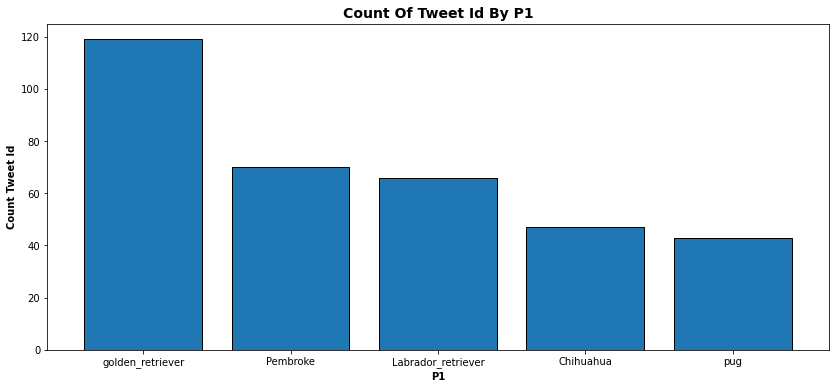

In [70]:
# Hence to achieve atleast 50% cetainty we stick to p1_conf
rate_50=tweet_data[(tweet_data['p1_conf']>=0.5) & (tweet_data['p1_dog']==True) ]
myGrpPlot(rate_50, 'p1', 'tweet_id', stat='count', index=None, figsize=[14, 6], kind='bar')

##### Breed of dog with the highest rating
#### procedures
- since most dogs tagged 'good dogs' are having rating numerator of over 10 out of rating denominator 10,
- hence we set threshold of rating(ratio) between the interval of 1 and 2 
- anything outside this interval maybe considered extreme value

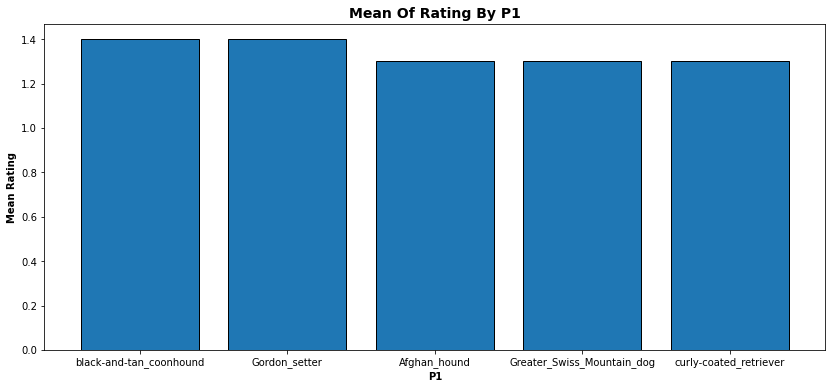

In [71]:
avg = tweet_data[(tweet_data['rating']>=1) & (tweet_data['rating']<=2) & 
               (tweet_data['p1_conf']>=0.5) & (tweet_data['p1_dog']==True)]
myGrpPlot(avg, 'p1', 'rating', stat='mean', kind='bar', figsize=[14,6])

#### Most common dog stage

In [72]:
#dog stages
tweet_data['dog_stages'].value_counts()

pupper     212
doggo       74
puppo       23
floofer      8
Name: dog_stages, dtype: int64

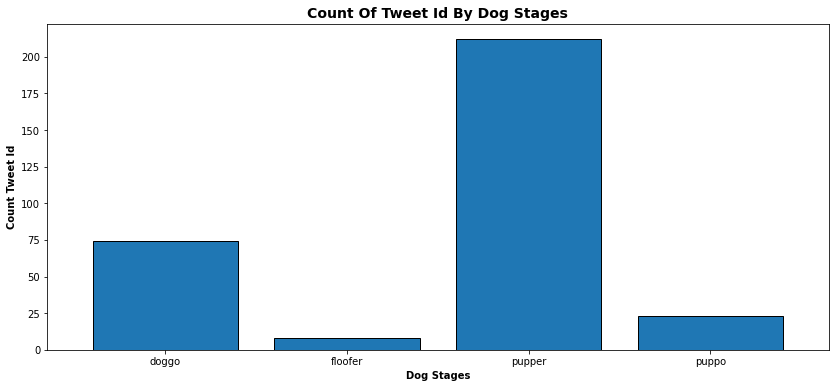

In [73]:
myGrpPlot(tweet_data, 'dog_stages', 'tweet_id', stat='count', kind='bar', figsize=[14,6])

#### Top users favourite dog  
- top users are defned by tweet_id's with high retweet and high favorite count
- establish the positive correlation bewtween favorite count and retweet count
- the dog breed must be with atleast 50% certainty 

In [74]:
tweet_data.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stages,rating,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN,1.3,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN,1.3,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN,1.2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN,1.3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN,1.2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,3200889,104


In [75]:
tweet_data.corr(method='pearson')['retweet_count']['favorite_count']

0.9137204531878323

In [77]:
high_retweet=rate_50[['tweet_id', 'retweet_count', 'p1', 'rating']][(rate_50['rating']>=1) & 
                                                (rate_50['rating']<=2)].sort_values('retweet_count', ascending=False)[:20]

In [78]:

high_favorites=rate_50[['tweet_id', 'favorite_count', 'p1', 'rating']][(rate_50['rating']>=1) & 
                                                    (rate_50['rating']<=2)].sort_values('favorite_count', ascending=False)[:20]

In [79]:
print(high_retweet[['tweet_id', 'p1']].groupby('p1').count())

                          tweet_id
p1                                
Chesapeake_Bay_retriever         1
Chihuahua                        1
Eskimo_dog                       1
French_bulldog                   1
Great_Pyrenees                   1
Labrador_retriever               3
Pembroke                         1
Pomeranian                       2
Rottweiler                       1
Samoyed                          1
chow                             1
golden_retriever                 4
toy_poodle                       2


In [80]:
print(high_favorites[['tweet_id', 'p1']].groupby('p1').count())

                          tweet_id
p1                                
Chesapeake_Bay_retriever         1
Chihuahua                        1
Eskimo_dog                       1
French_bulldog                   1
Labrador_retriever               3
Pembroke                         2
Pomeranian                       1
Rottweiler                       1
Saluki                           1
Samoyed                          1
chow                             1
golden_retriever                 5
toy_poodle                       1


<a id='insights'></a>
## Insights

- Golden retriever is the most popular dog with atleast 50% certainty
- Averagely 'black and tan hound' and 'Gordon setter' has the higest rating
- Pupper is the most common dog stage
- The correlation between retweet and favorite is positive which implies the higher the likes on a Twitter post, the higher the    the retweets.
- With atleast 50% certainty of the dog breed, of the top 20 users; Golden retriever is the common dog breed